## Data Analytics - Microdados ENEM 2019

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Na leitura dos dados, foi necessário informar as colunas desejadas devido o tamanho do arquivo (3 GB) 

colunas_df = ['NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ESCOLA','TP_ANO_CONCLUIU','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_REDACAO','Q001','Q002','Q006']

In [3]:
# Na leitura dos dados, foi necessário indicar o separador, a linguagem (ISO-8859-1)

df_ENEM = pd.read_csv(r"C:\Users\hiago.andrade\Downloads\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1', usecols=colunas_df)

In [4]:
df_ENEM.head(5)

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006
0,Santarém,PA,21,M,1,3,4,1,3,1,...,472.9,466.0,497.3,369.1,0,1.0,780.0,D,E,B
1,Mãe do Rio,PA,16,F,1,3,1,3,0,1,...,358.9,495.4,482.3,416.5,1,1.0,600.0,D,E,B
2,Paragominas,PA,18,F,1,1,1,2,0,3,...,574.2,538.7,582.6,571.5,0,1.0,640.0,H,E,C
3,São Sebastião da Boa Vista,PA,23,M,0,3,1,2,0,2,...,NaN,NaN,NaN,NaN,1,NaN,NaN,D,D,C
4,Juruti,PA,23,M,1,3,1,1,5,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,B,C,C


In [5]:
# (Linhas, Colunas)

df_ENEM.shape

(5095270, 26)

### 1 - Número de participantes por Estado

In [6]:
df_ENEM["SG_UF_RESIDENCIA"].value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

### 2 - Número de participantes por Município

In [7]:
df_ENEM["NO_MUNICIPIO_RESIDENCIA"].value_counts()

São Paulo         229837
Rio de Janeiro    137762
Brasília           94352
Fortaleza          93959
Salvador           88557
                   ...  
Coronel Pilar          9
Pracinha               9
Sério                  8
Araguainha             6
Forquetinha            5
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

### 3 - Número de participantes por Idade

In [8]:
df_ENEM["NU_IDADE"].value_counts()

18    864186
17    847303
19    577161
20    409385
16    316437
       ...  
91         2
92         1
87         1
88         1
94         1
Name: NU_IDADE, Length: 91, dtype: int64

In [9]:
# Número de participantes por Idade, ordenado por ordem crescente de idade

df_ENEM["NU_IDADE"].value_counts().sort_index()

1     2
2     4
3     4
4     2
5     5
     ..
87    1
88    1
91    2
92    1
94    1
Name: NU_IDADE, Length: 91, dtype: int64

<AxesSubplot:>

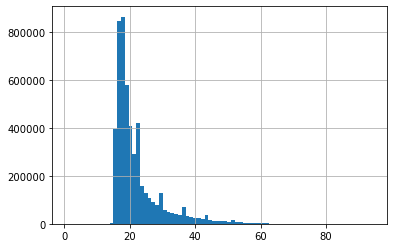

In [48]:
# Histograma dos participantes por idade (Bins aumenta ou diminui a distribuição do histograma)

df_ENEM["NU_IDADE"].hist(bins=80)

### 4 - Número de participantes por Sexo

In [11]:
df_ENEM["TP_SEXO"].value_counts()

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

In [12]:
# % Número de participantes por Sexo

sexo_percentual= (df_ENEM["TP_SEXO"].value_counts() / 5095270)*100
print(sexo_percentual)

F    59.502676
M    40.497324
Name: TP_SEXO, dtype: float64


### 5 - Verificando qual sexo possui melhor redação no ENEM

In [13]:
df_ENEM_sex_red = df_ENEM.filter(items=["TP_SEXO","NU_NOTA_REDACAO"])
df_ENEM_sex_red.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
3,M,NaN
4,M,NaN


In [14]:
# Retirando candidatos com sem nota na redação

df_ENEM_sex_red = df_ENEM_sex_red.dropna()
df_ENEM_sex_red.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
5,M,580.0
6,F,360.0


In [15]:
df_ENEM_sex_red.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

In [16]:
# Menor nota obtida por sexo (excluindo candidatos que zeraram a prova)

df_ENEM_sex_red[df_ENEM_sex_red.NU_NOTA_REDACAO>0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

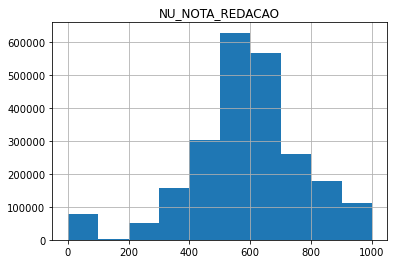

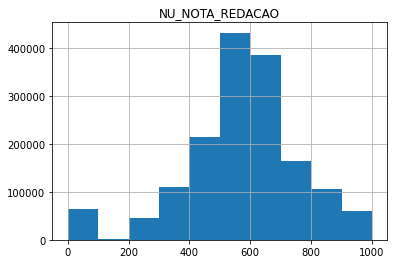

In [17]:
df_ENEM_sex_red.groupby('TP_SEXO').hist()

#### Como observado, a variavel sexo sozinha não é um bom indicador para determinar o desempenho na redação

### Analisando fatores sociais e econômicos:

In [18]:
# Novo dataframe apenas com as colunas desejadas para a análise

df_ENEM_sex_soci_red = df_ENEM.filter(items=["TP_SEXO","NU_NOTA_REDACAO","Q001","Q002","Q006"])
df_ENEM_sex_soci_red = df_ENEM_sex_soci_red.dropna()
df_ENEM_sex_soci_red.head()

,TP_SEXO,NU_NOTA_REDACAO,Q001,Q002,Q006
0,M,780.0,D,E,B
1,F,600.0,D,E,B
2,F,640.0,H,E,C
5,M,580.0,C,C,C
6,F,360.0,B,B,C


In [26]:
# Trazendo os significados das informações no dicionario de dados do ENEM

# Q001 = Até que série seu pai, ou o homem responsável por você, estudou?
# Q002 = Até que série sua mãe, ou a mulher responsável por você, estudou?
# Q006 = Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

Q001eQ002significado = {'A':'Nunca estudou.',
                        'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
                        'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
                        'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
                        'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
                        'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
                        'G':'Completou a Pós-graduação.',
                        'H':'Não sei.',}

Q006significado = {'A':'Nenhuma renda.',
                   'B':'Até 998,00.',
                   'C':'De 998,01 até 1.497,00.',
                   'D':'De 1.497,01 até 1.996,00.',
                   'E':'De 1.996,01 até 2.495,00.',
                   'F':'De 2.495,01 até 2.994,00.',
                   'G':'De 2.994,01 até 3.992,00.',
                   'H':'De 3.992,01 até 4.990,00.',
                   'I':'De 4.990,01 até 5.988,00.',
                   'J':'De 5.988,01 até 6.986,00.',
                   'K':'De 6.986,01 até 7.984,00.',
                   'L':'De 7.984,01 até 8.982,00.',
                   'M':'De 8.982,01 até 9.980,00.',
                   'N':'De 9.980,01 até 11.976,00.',
                   'O':'De 11.976,01 até 14.970,00.',
                   'P':'De 14.970,01 até 19.960,00.',
                   'Q':'Mais de 19.960,00.',}

In [27]:
# "procv" dos dicionarios criados com o dataframe 

df_ENEM_sex_soci_red['Sig_Q001'] = [Q001eQ002significado[resposta] for resposta in df_ENEM_sex_soci_red.Q001]
df_ENEM_sex_soci_red['Sig_Q002'] = [Q001eQ002significado[resposta] for resposta in df_ENEM_sex_soci_red.Q002]
df_ENEM_sex_soci_red['Sig_Q006'] = [Q006significado[resposta] for resposta in df_ENEM_sex_soci_red.Q006]

df_ENEM_sex_soci_red.head()

,TP_SEXO,NU_NOTA_REDACAO,Q001,Q002,Q006,Sig_Q001,Sig_Q002,Sig_Q006
0,M,780.0,D,E,B,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...","Até 998,00."
1,F,600.0,D,E,B,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...","Até 998,00."
2,F,640.0,H,E,C,Não sei.,"Completou o Ensino Médio, mas não completou a ...","De 998,01 até 1.497,00."
5,M,580.0,C,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...","De 998,01 até 1.497,00."
6,F,360.0,B,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,"De 998,01 até 1.497,00."


In [28]:
# Contando o número de variáveis de acordo com a resposta de cada candidato sobre a escolaridade do pai

df_ENEM_sex_soci_red['Sig_Q001'].value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1058282
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      805643
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     548748
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        459610
Não sei.                                                                                    329280
Completou a Faculdade, mas não completou a Pós-graduação.                                   320457
Completou a Pós-graduação.                                                                  200793
Nunca estudou.                                                                              200331
Name: Sig_Q001, dtype: int64

#### Na maior parte dos candidatos, o pai completou o Ensino Médio, mas não a Faculdade
##### Interessante observar que o número de Pais que completaram a Pós-graduação é similar ao numero de pais que nunca estudaram

In [29]:
# Contando o número de variáveis de acordo com a resposta de cada candidato sobre a escolaridade da mãe

df_ENEM_sex_soci_red['Sig_Q002'].value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1303340
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      592468
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        507256
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     503999
Completou a Faculdade, mas não completou a Pós-graduação.                                   433935
Completou a Pós-graduação.                                                                  345941
Nunca estudou.                                                                              130880
Não sei.                                                                                    105325
Name: Sig_Q002, dtype: int64

#### Assim como no caso dos pais, a maioria das mães completou o Ensino Médio, mas não a Faculdade
##### Já nesse caso, Interessante observar que o número de "não sei" é muito menor quando comparado com os Pais. Isso mostra indicios que uma quantidade relevante de candidatos podem não conhecer seus pais.

In [33]:
# Média na nota de redação de acordo com a resposta de cada candidato sobre a escolaridade do pai

df_ENEM_sex_soci_red.filter(items=['NU_NOTA_REDACAO','Sig_Q001'])\
                                    .groupby('Sig_Q001').mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Sig_Q001,
Completou a Pós-graduação.,694.972634
"Completou a Faculdade, mas não completou a Pós-graduação.",667.424584
"Completou o Ensino Médio, mas não completou a Faculdade.",597.312153
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",566.110398
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",549.869448
Não sei.,526.842383
Não completou a 4ª série/5º ano do Ensino Fundamental.,524.302749
Nunca estudou.,486.662873


In [34]:
# Média na nota de redação de acordo com a resposta de cada candidato sobre a escolaridade da mãe

df_ENEM_sex_soci_red.filter(items=['NU_NOTA_REDACAO','Sig_Q002'])\
                                    .groupby('Sig_Q002').mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Sig_Q002,
Completou a Pós-graduação.,670.202433
"Completou a Faculdade, mas não completou a Pós-graduação.",649.122242
"Completou o Ensino Médio, mas não completou a Faculdade.",583.298848
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",550.399443
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",535.135982
Não completou a 4ª série/5º ano do Ensino Fundamental.,513.507869
Não sei.,494.422407
Nunca estudou.,472.773686


#### Os indicadores sociais de educação podem ser consideradas boas variaveis para determinar o desempenho na redação, visto que quanto maior o nivel educacional dos pais, maior a nota média da redação dos candidatos

In [35]:
# Média na nota de redação de acordo com a resposta de cada candidato sobre sua renda familiar

df_ENEM_sex_soci_red.filter(items=['NU_NOTA_REDACAO','Sig_Q006'])\
                                    .groupby('Sig_Q006').mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Sig_Q006,
"Mais de 19.960,00.",739.822144
"De 14.970,01 até 19.960,00.",730.822273
"De 11.976,01 até 14.970,00.",721.018687
"De 9.980,01 até 11.976,00.",707.907541
"De 8.982,01 até 9.980,00.",697.769873
"De 7.984,01 até 8.982,00.",695.003674
"De 6.986,01 até 7.984,00.",684.085178
"De 5.988,01 até 6.986,00.",676.622158
"De 4.990,01 até 5.988,00.",659.431436


#### O indicador renda tambem pode ser considerado uma boa variavel, visto que quanto maior a renda familiar, maior a nota média da redação dos candidatos. Quanto maior a renda, os candidatos tendem a frequentar melhores escolas, realizar cursos preparatórios particulares etc

### Unindo os fatores sociais com o sexo 

In [37]:
# Média na nota de redação de acordo com a resposta de cada candidato sobre sua renda familiar, candidatos sexo masculino

df_ENEM_sex_soci_red.filter(items=['NU_NOTA_REDACAO','Sig_Q006'])\
                                    .where(df_ENEM_sex_soci_red.TP_SEXO == 'M')\
                                    .groupby('Sig_Q006').mean()
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Sig_Q006,
"Mais de 19.960,00.",721.177673
"De 14.970,01 até 19.960,00.",710.135825
"De 11.976,01 até 14.970,00.",696.975766
"De 9.980,01 até 11.976,00.",683.655998
"De 8.982,01 até 9.980,00.",671.750241
"De 7.984,01 até 8.982,00.",668.441167
"De 6.986,01 até 7.984,00.",657.013936
"De 5.988,01 até 6.986,00.",650.100309
"De 4.990,01 até 5.988,00.",633.901796


In [38]:
# Média na nota de redação de acordo com a resposta de cada candidato sobre sua renda familiar, candidatos sexo feminino

df_ENEM_sex_soci_red.filter(items=['NU_NOTA_REDACAO','Sig_Q006'])\
                                    .where(df_ENEM_sex_soci_red.TP_SEXO == 'F')\
                                    .groupby('Sig_Q006').mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Sig_Q006,
"Mais de 19.960,00.",760.026410
"De 14.970,01 até 19.960,00.",750.820946
"De 11.976,01 até 14.970,00.",743.803384
"De 9.980,01 até 11.976,00.",729.889656
"De 8.982,01 até 9.980,00.",721.034500
"De 7.984,01 até 8.982,00.",718.527462
"De 6.986,01 até 7.984,00.",707.979749
"De 5.988,01 até 6.986,00.",699.392070
"De 4.990,01 até 5.988,00.",681.865174


<AxesSubplot:xlabel='Q001'>

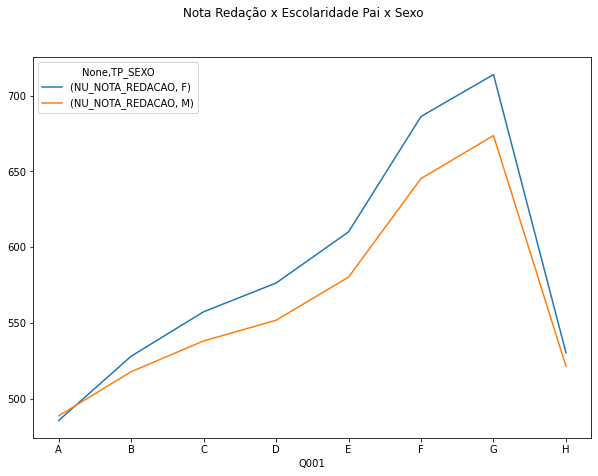

In [61]:
# Gráfico da nota média por sexo do candidato e escolaridade do Pai
# H = "Não sei"

fig, ax = plt.subplots(figsize=(10,7))
plt.suptitle('Nota Redação x Escolaridade Pai x Sexo')

df_ENEM_sex_soci_red.filter(items=['TP_SEXO','Q001','NU_NOTA_REDACAO'])\
                                    .groupby(['Q001','TP_SEXO']).mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                    .unstack().plot(ax=ax, )

<AxesSubplot:xlabel='Q002'>

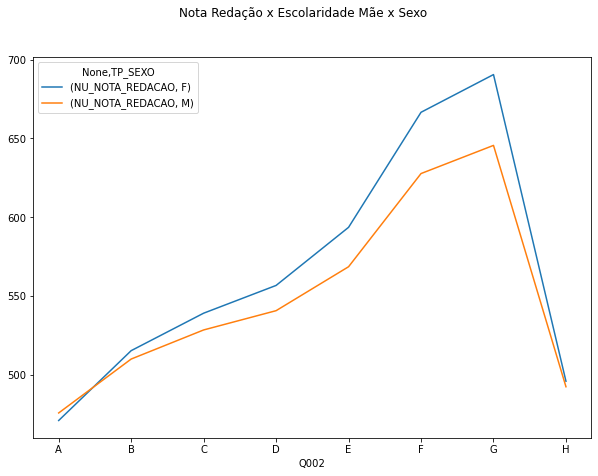

In [62]:
# Gráfico da nota média por sexo do candidato e escolaridade do Pai
# H = "Não sei"

fig, ax = plt.subplots(figsize=(10,7))
plt.suptitle('Nota Redação x Escolaridade Mãe x Sexo')

df_ENEM_sex_soci_red.filter(items=['TP_SEXO','Q002','NU_NOTA_REDACAO'])\
                                    .groupby(['Q002','TP_SEXO']).mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                    .unstack().plot(ax=ax, )

<AxesSubplot:xlabel='Q006'>

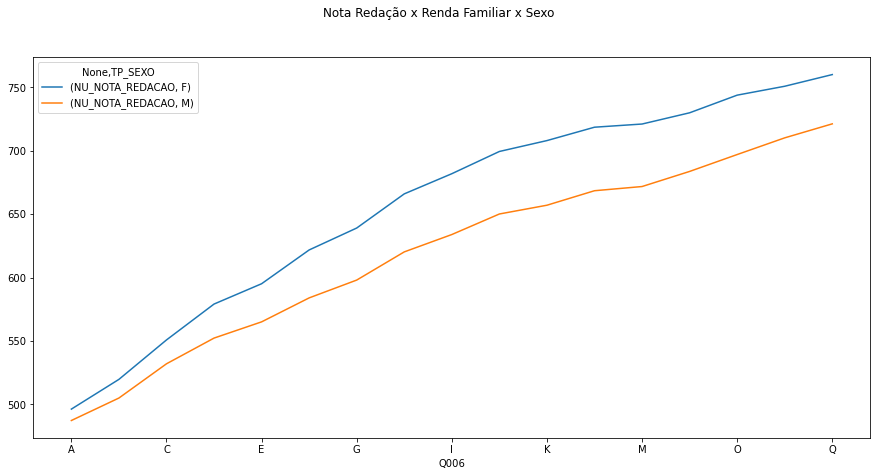

In [68]:
# Gráfico da nota média por sexo do candidato e renda familiar

fig, ax = plt.subplots(figsize=(15,7))
plt.suptitle('Nota Redação x Renda Familiar x Sexo')

df_ENEM_sex_soci_red.filter(items=['TP_SEXO','Q006','NU_NOTA_REDACAO'])\
                                    .groupby(['Q006','TP_SEXO']).mean()\
                                    .sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                    .unstack().plot(ax=ax, )

### Unindo fatores sociais e economicos na análise do sexo é possivel observar que as mulheres, em média, tendem a possuir notas superiores na redação que os homens